## Car Acceptability: Classification

Dataset Source: https://www.kaggle.com/datasets/subhajeetdas/car-acceptability-classification-dataset

#### Import Necessary Libraries

In [1]:
import os, sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier, VotingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import imblearn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

import xgboost as xgb
from xgboost import XGBClassifier

#### Show Library Versions

In [2]:
n = 18

print(f"Language/Library".rjust(n-2), '|', 'Version')
print('-' * (n-2), '|', '--------')
print("Python :".rjust(n), sys.version[0:6])
print("NumPy :".rjust(n), np.__version__)
print("Pandas :".rjust(n), pd.__version__)
print("Sklearn :".rjust(n), sklearn.__version__)
print('XGBoost :'.rjust(n), xgb.__version__)
print("Imblearn :".rjust(n), imblearn.__version__)
print("Seaborn :".rjust(n), sns.__version__)

Language/Library | Version
---------------- | --------
          Python : 3.9.12
           NumPy : 1.25.0
          Pandas : 2.0.2
         Sklearn : 1.2.2
         XGBoost : 1.7.6
        Imblearn : 0.10.1
         Seaborn : 0.12.2


### Initial Data Preprocessing

#### Ingest Dataset

In [3]:
col_names = ["purchase_price",
             "maintenance_price", 
             "num_of_doors", 
             "seating_capacity",
             "luggage_space", 
             "safety", 
             "label"
             ]

dtypes = {"purchase_price": str,
          "maintenance_price": str, 
          "num_of_doors": str, 
          "seating_capacity": str,
          "luggage_space": str, 
          "safety": str,
          "label": str
              }

data = pd.read_csv("car.csv",
                   names=col_names, 
                   dtype=dtypes,
                   engine='c',
                   header=0)

data.head()

,purchase_price,maintenance_price,num_of_doors,seating_capacity,luggage_space,safety,label
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


#### More Dataset Information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   purchase_price     1728 non-null   object
 1   maintenance_price  1728 non-null   object
 2   num_of_doors       1728 non-null   object
 3   seating_capacity   1728 non-null   object
 4   luggage_space      1728 non-null   object
 5   safety             1728 non-null   object
 6   label              1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Visualizations

#### Create Function to Visualize Features (Barplot)

In [5]:
def barplot_visual(feature_to_visualize: pd.Series,
                   plot_title: str,
                   x_label: str,
                   y_label: str = "# of Samples",
                   ):
    """
    This function returns a histogram for a feature.
    
    Inputs: 
    - feature_to_visualize: Feature to plot in the form 
    of pandas Series.
    - plot_title: The title of the plot/visual.
    - x_label: The string label value for the x label.
    - y_label: The string label value for the y label.
    
    Output:
    - A Bar Plot.
    """
    
    assert type(feature_to_visualize) == pd.Series, \
        "Make sure the dataset input type is a Pandas Series."
    assert type(plot_title) != 'str', \
        "The title value must be a string value."
    assert type(x_label) !=  'str', \
        "The x label value must be a string value."
    assert type(y_label) != 'str', \
        "The y label value must be a string value."
        
    ax = feature_to_visualize.value_counts().plot.bar( 
                                                      figsize=(12,8),
                                                      rot=0, 
                                                      legend=False,
                                                      color=["lightgreen", 
                                                             "blue", 
                                                             "brown", 
                                                             "lightblue",
                                                             "tan", 
                                                             "yellow", 
                                                             "orange",
                                                             "green", 
                                                             "red",
                                                             "purple"]
                                                      )
    
    ax.bar_label(ax.containers[0])
    
    plt.suptitle('')
    plt.title(plot_title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    
    plt.show()

#### Dataset Visualization: Purchase Price

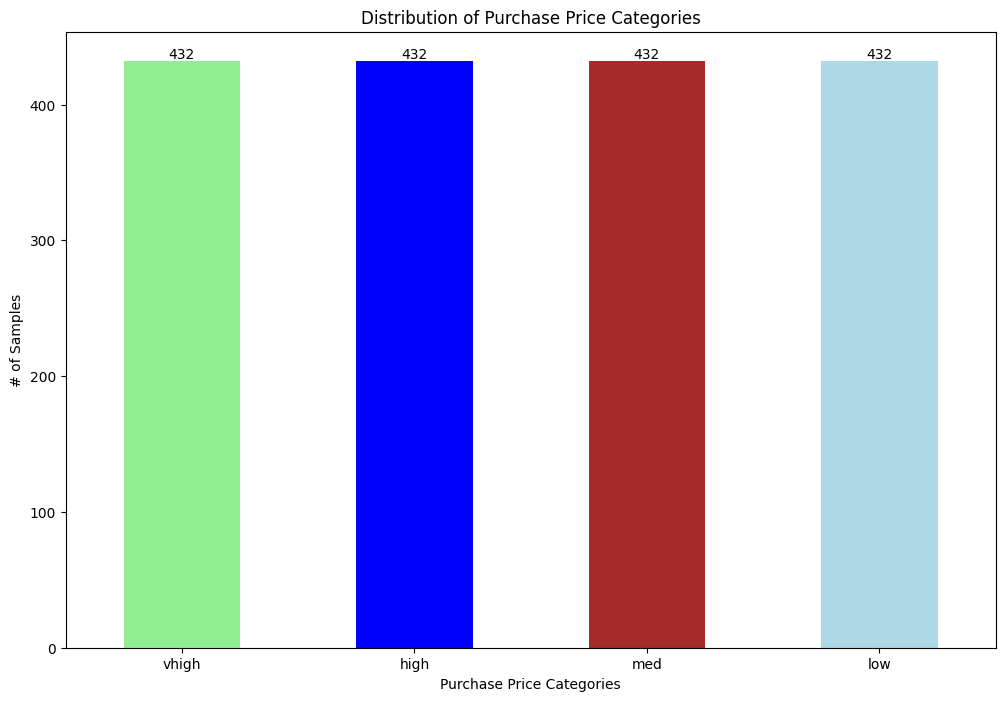

In [6]:
barplot_visual(data["purchase_price"],
               "Distribution of Purchase Price Categories",
               "Purchase Price Categories",
               "# of Samples",
               )

#### Dataset Visualization: Maintenance Price

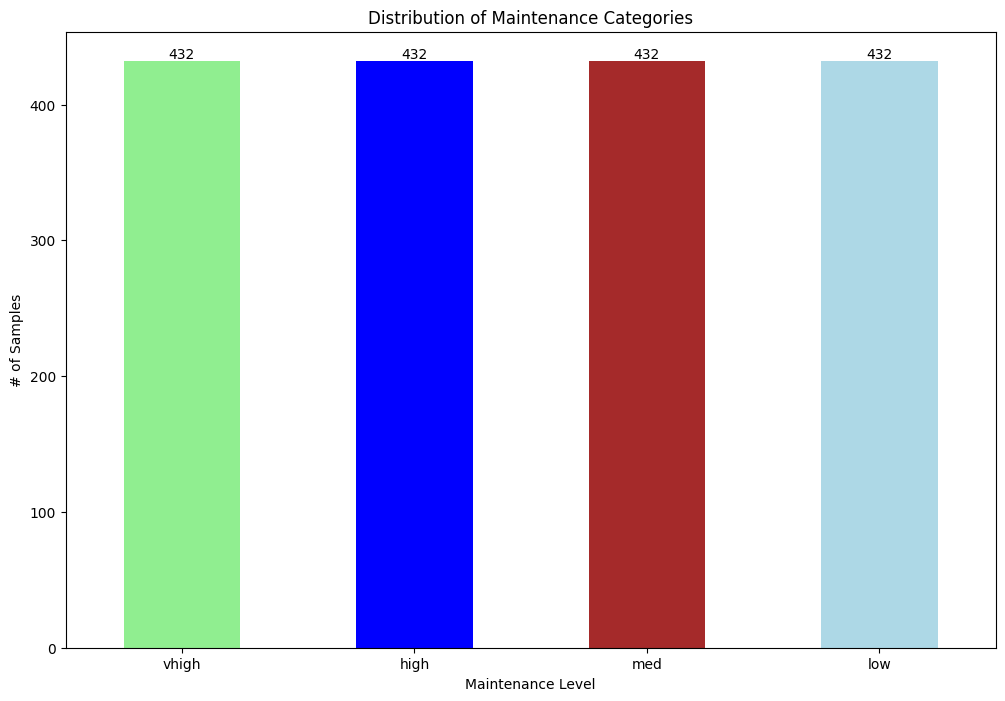

In [7]:
barplot_visual(data["maintenance_price"],
               "Distribution of Maintenance Categories",
               "Maintenance Level",
               "# of Samples",
               )

#### Dataset Visualization: Number of Car Doors

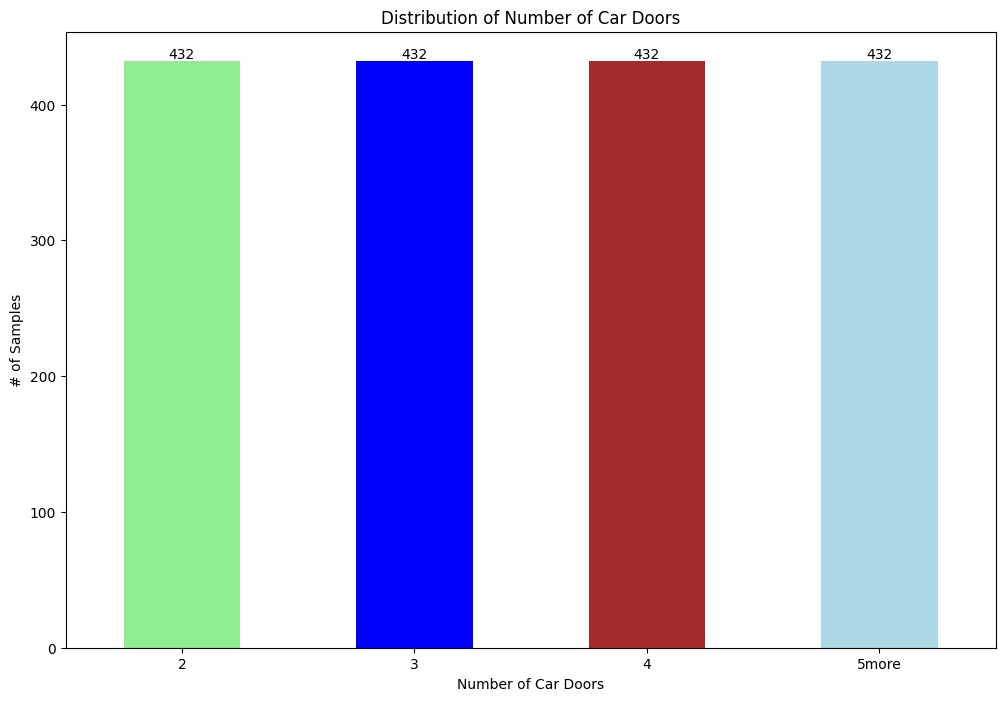

In [8]:
barplot_visual(data["num_of_doors"],
               "Distribution of Number of Car Doors",
               "Number of Car Doors",
               "# of Samples",
               )

#### Dataset Visualization: Seating Capacity

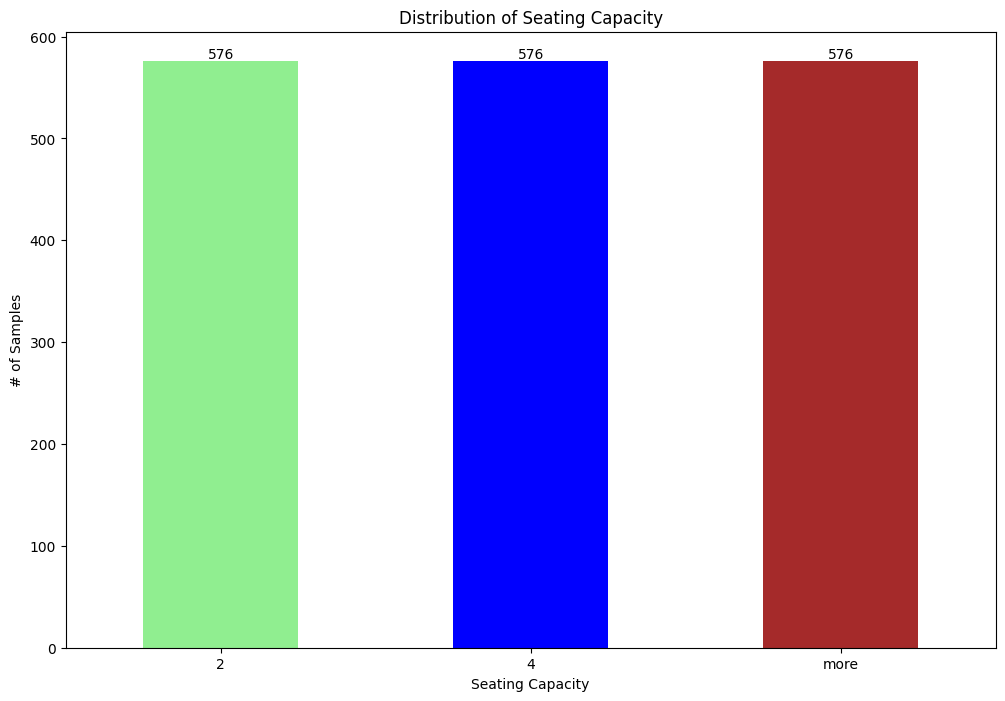

In [9]:
barplot_visual(data["seating_capacity"],
               "Distribution of Seating Capacity",
               "Seating Capacity",
               "# of Samples",
               )

#### Dataset Visualization: Luggage Space

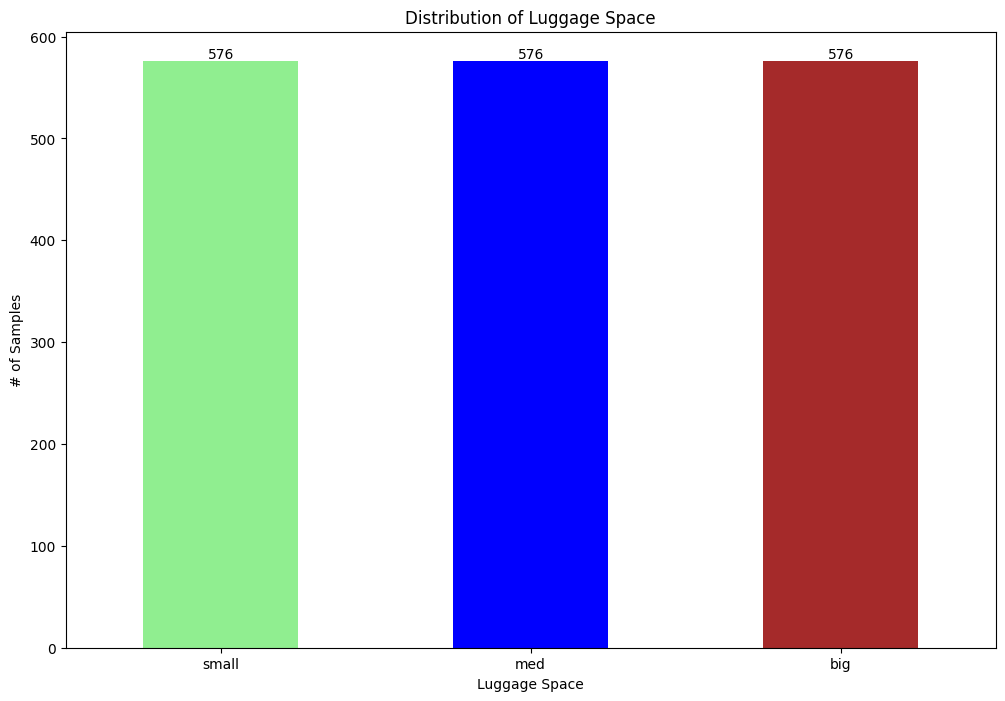

In [10]:
barplot_visual(data["luggage_space"],
               "Distribution of Luggage Space",
               "Luggage Space",
               "# of Samples",
               )

#### Dataset Visualization: Safety Level

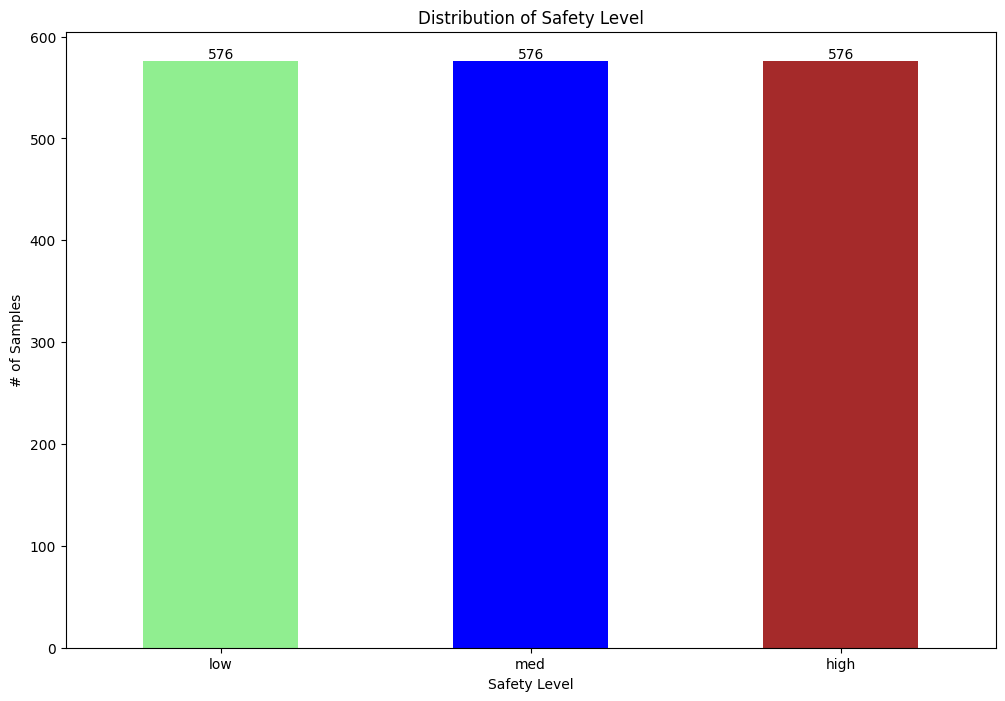

In [11]:
barplot_visual(data["safety"],
               "Distribution of Safety Level",
               "Safety Level",
               "# of Samples",
               )

#### Dataset Visualization: Class Distribution (Car Acceptability)

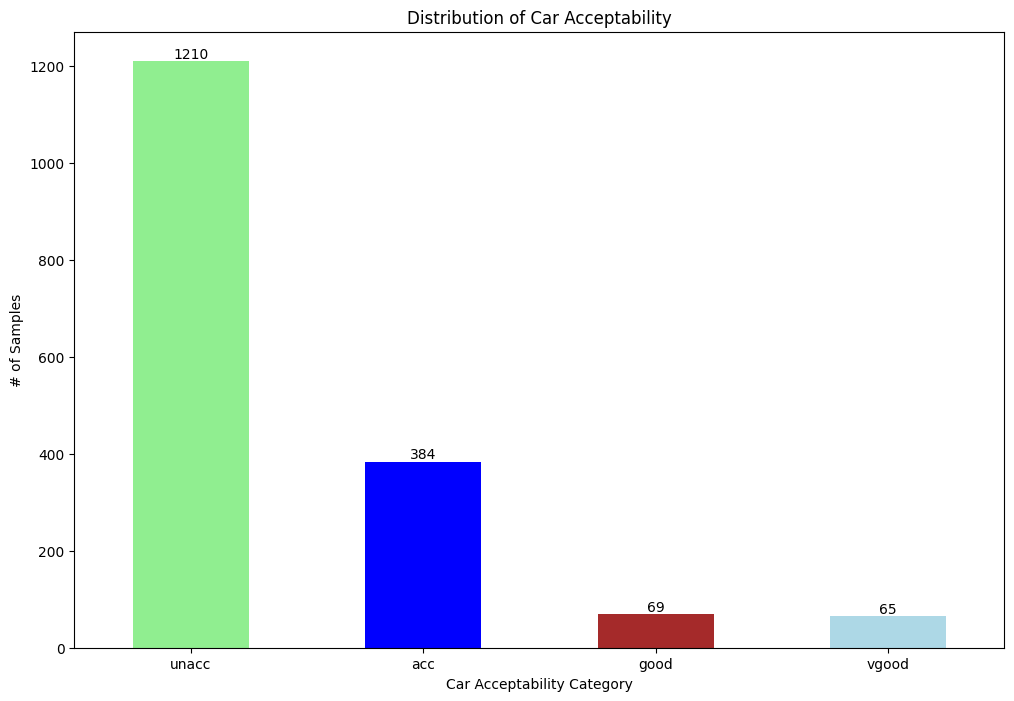

In [12]:
barplot_visual(data["label"],
               "Distribution of Car Acceptability",
               "Car Acceptability Category",
               "# of Samples",
               )

#### Convert String Values to Integers for Correlation Matrix

In [13]:
#luggage_space, safety, label

purchase_price_converter = {"low": 0,
                            "med": 1,
                            "high": 2,
                            "vhigh": 3}

maintenance_price_converter = {"low": 0,
                            "med": 1,
                            "high": 2,
                            "vhigh": 3}

luggage_space_converter = {"small": 0,
                           "med": 1,
                           "big": 2}

safety_converter = {"low": 0,
                    "med": 1,
                    "high": 2}

label_converter = {"unacc": 0,
                   "acc": 1,
                   "good": 2,
                   "vgood": 3}

corr_data = pd.DataFrame()

corr_data['purchase_price'] = data['purchase_price']\
    .replace(purchase_price_converter)\
    .astype(np.int8)
corr_data['maintenance_price'] = data['maintenance_price']\
    .replace(maintenance_price_converter)\
    .astype(np.int8)
corr_data['luggage_space'] = data['luggage_space']\
    .replace(luggage_space_converter)\
    .astype(np.int8)
corr_data['safety'] = data['safety']\
    .replace(safety_converter)\
    .astype(np.int8)
corr_data['label'] = data['label']\
    .replace(label_converter)\
    .astype(np.int8)

# Just change the "5more" to 5 & convert 
# to integer for 'num_of_doors'
corr_data['num_of_doors'] = data['num_of_doors']\
    .replace({"5more": 5})\
    .astype(np.int8)

# for seating_capacity, just change 'more' to 5 
# & convert to integer
corr_data['seating_capacity'] = data['seating_capacity']\
    .replace({"more": 5})\
    .astype(np.int8)

corr_data

,purchase_price,maintenance_price,luggage_space,safety,label,num_of_doors,seating_capacity
0,3,3,0,0,0,2,2
1,3,3,0,1,0,2,2
2,3,3,0,2,0,2,2
3,3,3,1,0,0,2,2
4,3,3,1,1,0,2,2
...,...,...,...,...,...,...,...
1723,0,0,1,1,2,5,5
1724,0,0,1,2,3,5,5
1725,0,0,2,0,0,5,5
1726,0,0,2,1,2,5,5


#### Correlation Matrix

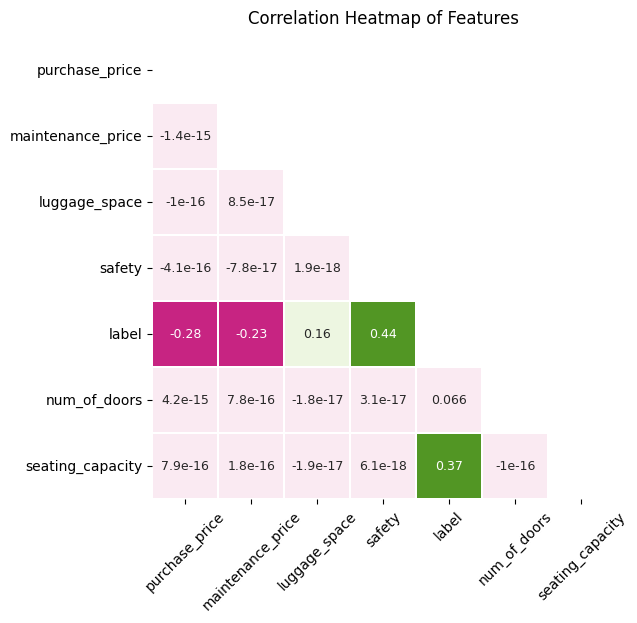

In [14]:
plt.figure(figsize=(6, 6))

lower_triangle = np.triu(corr_data.corr())

corr_matrix = sns.heatmap(corr_data.corr(), 
                          annot=True, 
                          cmap=sns.color_palette("PiYG", 8),
                          mask=lower_triangle,
                          square=True,
                          linewidths=0.25,
                          cbar=False,
                          annot_kws={"size":9})

corr_matrix.set_title("Correlation Heatmap of Features", 
                      pad=10)

corr_matrix.set_xticklabels(corr_matrix.get_xticklabels(), 
                            rotation=45)
plt.show()

#### Convert Label Values From String to Integer

In [15]:
label_converter = {"unacc": 0,
                   "acc": 1,
                   "good": 2,
                   "vgood": 3}

data['label'] = data['label']\
    .replace(label_converter)\
    .astype(np.int8)

### Exploratory Data Analysis & Preprocessing

#### Descriptive Statistics

In [16]:
data.describe(percentiles=[0.01, 0.10, 0.25, 0.50, 0.75, 0.90,0.99], include='all')

,purchase_price,maintenance_price,num_of_doors,seating_capacity,luggage_space,safety,label
count,1728,1728,1728,1728,1728,1728,1728.000000
unique,4,4,4,3,3,3,NaN
top,vhigh,vhigh,2,2,small,low,NaN
freq,432,432,432,576,576,576,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.414931
std,NaN,NaN,NaN,NaN,NaN,NaN,0.740700
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
10%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### Prepare Shared Pipeline Data & Stages/Steps

#### Split Dataset into Training & Testing Datasets

In [17]:
y = data['label']
X = data.drop(columns=['label'], axis=1)

print(f"Input Dataset Shape: {X.shape}")
print(f"Output Dataset Shape: {y.shape}")

Input Dataset Shape: (1728, 6)
Output Dataset Shape: (1728,)


#### Define Column Lists for Transformers (Pipeline Stages) & Transform to Integer Values

In [18]:
ord_features = ["safety"]

nom_features = [x for x in data.columns.unique() if (x != "label" and x not in ord_features)]

label_class = ['label']

#### Create Column Transformer

In [19]:
encoder_col_transformer = ColumnTransformer(
    [
        (
            'ord_encoder', 
            OrdinalEncoder(handle_unknown='use_encoded_value', 
                           unknown_value=-1,
                           dtype=np.float64), 
            ord_features
            ), 
        (
            'ohe', 
            OneHotEncoder(handle_unknown='ignore',
                          dtype=np.float64), 
            nom_features
        )
    ], 
    remainder='passthrough')

#### Metrics Evaluation Method

In [20]:
def metrics_evaluation(classifier_type,
                       y_test, 
                       y_pred_cv):
    
    
    print("+-------------------------------------------------------------------------+")
    print("|  " + ("Confusion Matrix for " + classifier_type).center(69) + "  |")
    print("+-------------------------------------------------------------------------+")
    
    cm = confusion_matrix(y_test, 
                          y_pred_cv)

    display_cm = ConfusionMatrixDisplay(cm, 
                                        display_labels=[
                                            "Unacceptable", 
                                            "Acceptable", 
                                            "Good", 
                                            "Very Good"
                                            ]
                                        )

    display_cm.plot()
    plt.show()
    
    print("+-----------------------------------------------------+")
    print("|  " + ("Classification Report for " + classifier_type).center(49) + "  |")
    print("+-----------------------------------------------------+")
    
    print(classification_report(y_test, 
                                y_pred_cv, 
                                zero_division=0,
                                target_names=[
                                    "Unacceptable", 
                                    "Acceptable", 
                                    "Good", 
                                    "Very Good"
                                    ]
                                )
          )

### Random Forest Classifier

#### Define Pipeline

In [21]:
def random_forest_classifier():
    """
    This function creates the random forest classifier.
    """
    random_forest_pipe = Pipeline(
        [
            (
                'encoder_column_transformer', 
                encoder_col_transformer
            ),
            (
                'smote',
                SMOTE(random_state=42, 
                      sampling_strategy='all')
            ),
            (
                "scaler",
                StandardScaler()
            ),
            (
                'random_forest', 
                RandomForestClassifier(criterion="entropy",
                                       n_estimators=200,
                                       random_state=42,
                                       class_weight='balanced_subsample'
                                       )
             ),
        ]
    )
    
    return random_forest_pipe

#### Define Model

In [22]:
rfc = random_forest_classifier()

rfc.named_steps

{'encoder_column_transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('ord_encoder',
                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                 unknown_value=-1),
                                  ['safety']),
                                 ('ohe', OneHotEncoder(handle_unknown='ignore'),
                                  ['purchase_price', 'maintenance_price',
                                   'num_of_doors', 'seating_capacity',
                                   'luggage_space'])]),
 'smote': SMOTE(random_state=42, sampling_strategy='all'),
 'scaler': StandardScaler(),
 'random_forest': RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                        n_estimators=200, random_state=42)}

#### Fit Dataset to Random Forest Classifier

In [23]:
rfr_preds = cross_val_predict(rfc, 
                              X, 
                              y, 
                              cv=10)

#### Metrics Evaluation

+-------------------------------------------------------------------------+
|                    Confusion Matrix for Random Forest                   |
+-------------------------------------------------------------------------+


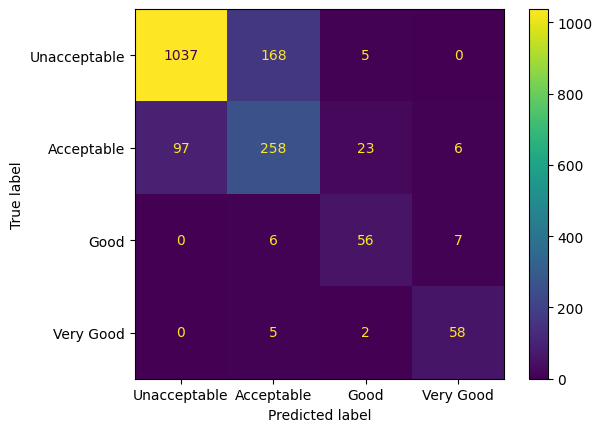

+-----------------------------------------------------+
|       Classification Report for Random Forest       |
+-----------------------------------------------------+
              precision    recall  f1-score   support

Unacceptable       0.91      0.86      0.88      1210
  Acceptable       0.59      0.67      0.63       384
        Good       0.65      0.81      0.72        69
   Very Good       0.82      0.89      0.85        65

    accuracy                           0.82      1728
   macro avg       0.74      0.81      0.77      1728
weighted avg       0.83      0.82      0.82      1728



In [24]:
metrics_evaluation("Random Forest", 
                       y, 
                       rfr_preds)

### Naive Bayes Classifier

#### Define Pipeline

In [25]:
def naive_bayes_classifier():
    """
    This function creates the naive bayes classifier.
    """
    naive_bayes_pipe = Pipeline(
        [
            (
                'encoder_column_transformer', 
                encoder_col_transformer
            ),
            (
                'smote',
                SMOTE(random_state=42, 
                      sampling_strategy='all')
            ),
            (
                'scaler', 
                MinMaxScaler(),
            ),
            (
                'naive_bayes', 
                MultinomialNB(alpha=0.001)
             ),
        ]
    )
    
    return naive_bayes_pipe

#### Fit Model

In [26]:
nbc = naive_bayes_classifier()

nbc.named_steps

{'encoder_column_transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('ord_encoder',
                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                 unknown_value=-1),
                                  ['safety']),
                                 ('ohe', OneHotEncoder(handle_unknown='ignore'),
                                  ['purchase_price', 'maintenance_price',
                                   'num_of_doors', 'seating_capacity',
                                   'luggage_space'])]),
 'smote': SMOTE(random_state=42, sampling_strategy='all'),
 'scaler': MinMaxScaler(),
 'naive_bayes': MultinomialNB(alpha=0.001)}

#### Fit Naive Bayes Classifier to Dataset

In [27]:
nbc_preds = cross_val_predict(nbc, 
                              X, 
                              y, 
                              n_jobs=-1,
                              cv=10)

#### Metrics Evaluation

+-------------------------------------------------------------------------+
|                     Confusion Matrix for Naive Bayes                    |
+-------------------------------------------------------------------------+


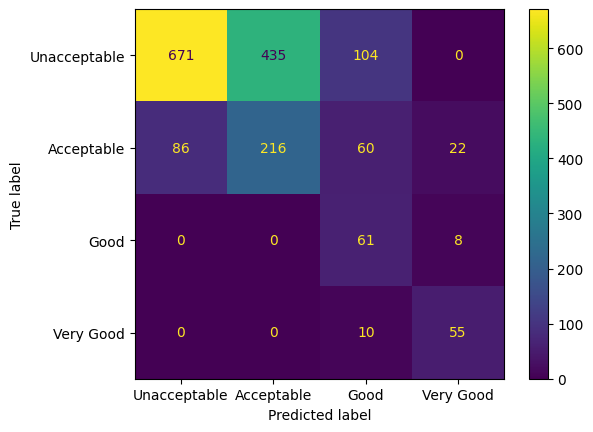

+-----------------------------------------------------+
|        Classification Report for Naive Bayes        |
+-----------------------------------------------------+
              precision    recall  f1-score   support

Unacceptable       0.89      0.55      0.68      1210
  Acceptable       0.33      0.56      0.42       384
        Good       0.26      0.88      0.40        69
   Very Good       0.65      0.85      0.73        65

    accuracy                           0.58      1728
   macro avg       0.53      0.71      0.56      1728
weighted avg       0.73      0.58      0.61      1728



In [28]:
metrics_evaluation("Naive Bayes", 
                       y, 
                       nbc_preds)

### Logistic Regression Classifier

#### Define Pipeline

In [29]:
def logistic_regression_classifier():
    """
    This function creates the logistic regression classifier.
    """
    log_reg_pipe = Pipeline(
        [
            (
                'encoder_column_transformer', 
                encoder_col_transformer),
            (
                "scaler",
                StandardScaler()),
            (
                'smote',
                SMOTE(random_state=42, 
                      sampling_strategy='all')),
            (
                'log_reg', 
                LogisticRegression(solver='newton-cg',
                                   max_iter=300,
                                   C=0.99,
                                   n_jobs=-1)
             ),
        ]
    )
    
    return log_reg_pipe

#### Fit Model

In [30]:
log_reg = logistic_regression_classifier()

log_reg.named_steps

{'encoder_column_transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('ord_encoder',
                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                 unknown_value=-1),
                                  ['safety']),
                                 ('ohe', OneHotEncoder(handle_unknown='ignore'),
                                  ['purchase_price', 'maintenance_price',
                                   'num_of_doors', 'seating_capacity',
                                   'luggage_space'])]),
 'scaler': StandardScaler(),
 'smote': SMOTE(random_state=42, sampling_strategy='all'),
 'log_reg': LogisticRegression(C=0.99, max_iter=300, n_jobs=-1, solver='newton-cg')}

#### Fit Logistic Regression Classifier to Dataset

In [31]:
log_reg_preds = cross_val_predict(log_reg, 
                              X, 
                              y, 
                              n_jobs=-1,
                              cv=10)

#### Metrics Evaluation

+-------------------------------------------------------------------------+
|                 Confusion Matrix for Logistic Regression                |
+-------------------------------------------------------------------------+


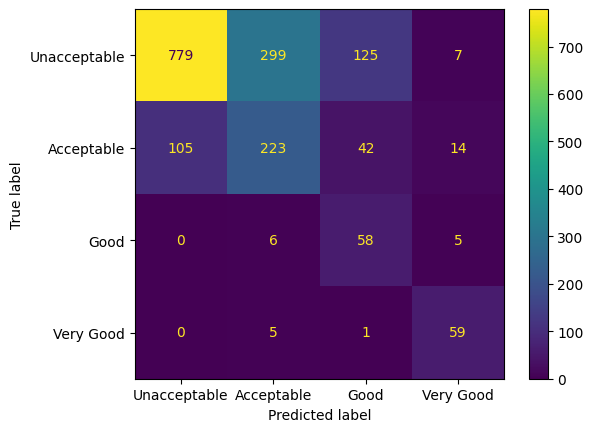

+-----------------------------------------------------+
|    Classification Report for Logistic Regression    |
+-----------------------------------------------------+
              precision    recall  f1-score   support

Unacceptable       0.88      0.64      0.74      1210
  Acceptable       0.42      0.58      0.49       384
        Good       0.26      0.84      0.39        69
   Very Good       0.69      0.91      0.79        65

    accuracy                           0.65      1728
   macro avg       0.56      0.74      0.60      1728
weighted avg       0.75      0.65      0.67      1728



In [32]:
metrics_evaluation("Logistic Regression", 
                       y, 
                       log_reg_preds)

### K-Nearest Neighbors Classifier

#### Define KNN Pipeline

In [33]:
def knn_classifier():
    """
    This function creates the K-Nearest Neighbors classifier.
    """
    knn_pipe = Pipeline(
        [
            (
                'encoder_column_transformer', 
                encoder_col_transformer
            ),
            (
                'smote',
                SMOTE(random_state=42, 
                      sampling_strategy='all')
            ),
            (
                "scaler",
                StandardScaler()
            ),
            (
                'knn_clf', 
                KNeighborsClassifier(weights='uniform',
                                     p=1,
                                     metric='manhattan',
                                     n_neighbors=9)
             ),
        ]
    )
    
    return knn_pipe

#### Fit Model

In [34]:
knn_clf = knn_classifier()

knn_clf.named_steps

{'encoder_column_transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('ord_encoder',
                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                 unknown_value=-1),
                                  ['safety']),
                                 ('ohe', OneHotEncoder(handle_unknown='ignore'),
                                  ['purchase_price', 'maintenance_price',
                                   'num_of_doors', 'seating_capacity',
                                   'luggage_space'])]),
 'smote': SMOTE(random_state=42, sampling_strategy='all'),
 'scaler': StandardScaler(),
 'knn_clf': KNeighborsClassifier(metric='manhattan', n_neighbors=9, p=1)}

#### Fit KNN Classifier to Dataset

In [35]:
knn_preds = cross_val_predict(knn_clf, 
                              X, 
                              y, 
                              n_jobs=-1,
                              cv=10)

#### Metrics Evaluation

+-------------------------------------------------------------------------+
|                 Confusion Matrix for K-Nearest Neighbors                |
+-------------------------------------------------------------------------+


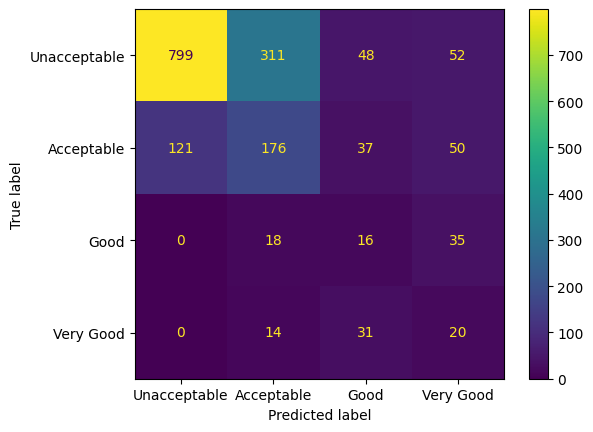

+-----------------------------------------------------+
|    Classification Report for K-Nearest Neighbors    |
+-----------------------------------------------------+
              precision    recall  f1-score   support

Unacceptable       0.87      0.66      0.75      1210
  Acceptable       0.34      0.46      0.39       384
        Good       0.12      0.23      0.16        69
   Very Good       0.13      0.31      0.18        65

    accuracy                           0.59      1728
   macro avg       0.36      0.41      0.37      1728
weighted avg       0.69      0.59      0.63      1728



In [36]:
metrics_evaluation("K-Nearest Neighbors", 
                       y, 
                       knn_preds)

### Single Vector Machine (SVM) Classifier

#### Define Pipeline

In [37]:
def single_vector_machine_classifier():
    """
    This function creates the Single Vector Machine classifier.
    """
    svm_pipe = Pipeline(
        [
            (
                'encoder_column_transformer', 
                encoder_col_transformer
            ),
            (
                'smote',
                SMOTE(random_state=42, 
                      sampling_strategy='all')
            ),
            (
                "scaler",
                StandardScaler()
            ),
            (
                'svm', 
                SVC(kernel='linear', 
                    C=0.99,
                    random_state=42)
             ),
        ]
    )
    
    return svm_pipe

#### Fit Model

In [38]:
svm = single_vector_machine_classifier()

svm.named_steps

{'encoder_column_transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('ord_encoder',
                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                 unknown_value=-1),
                                  ['safety']),
                                 ('ohe', OneHotEncoder(handle_unknown='ignore'),
                                  ['purchase_price', 'maintenance_price',
                                   'num_of_doors', 'seating_capacity',
                                   'luggage_space'])]),
 'smote': SMOTE(random_state=42, sampling_strategy='all'),
 'scaler': StandardScaler(),
 'svm': SVC(C=0.99, kernel='linear', random_state=42)}

#### Fit Classifier to Dataset

In [39]:
svm_preds = cross_val_predict(svm, 
                              X, 
                              y, 
                              n_jobs=-1,
                              cv=10)

#### Evaluation Metrics

+-------------------------------------------------------------------------+
|                Confusion Matrix for Single Vector Machine               |
+-------------------------------------------------------------------------+


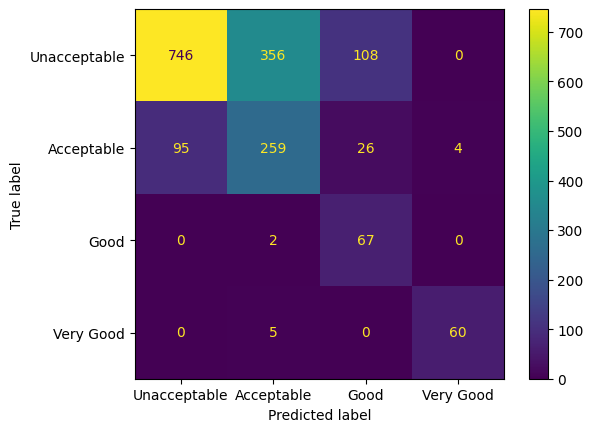

+-----------------------------------------------------+
|   Classification Report for Single Vector Machine   |
+-----------------------------------------------------+
              precision    recall  f1-score   support

Unacceptable       0.89      0.62      0.73      1210
  Acceptable       0.42      0.67      0.51       384
        Good       0.33      0.97      0.50        69
   Very Good       0.94      0.92      0.93        65

    accuracy                           0.66      1728
   macro avg       0.64      0.80      0.67      1728
weighted avg       0.76      0.66      0.68      1728



In [40]:
metrics_evaluation("Single Vector Machine", 
                       y, 
                       svm_preds)

### Gradient Boosting Classifier Classifier

#### Parameters for Gradient Bossting Classifier

In [41]:
params = {'booster': 'dart',
          'max_depth': 10,
          'n_estimators': 300,
          'reg_alpha': 0.75,
          'reg_lambda': 0.75,
          'learning_rate': 0.10,
          'random_state': 42,
          'tree_method': 'approx',
          'eval_metric': ['error'],
          'objective': 'multi:softmax'}

#### Define Pipeline

In [42]:
def gradient_boosted_classifier(params):
    """
    This function creates gradient boosting classifier.
    """
    xgb_pipe = Pipeline(
        [
            (
                'encoder_column_transformer', 
                encoder_col_transformer),
            (
                'xgb_clf', 
                XGBClassifier(**params)
             ),
        ])
    
    return xgb_pipe

#### Fit Model

In [43]:
xgbc = gradient_boosted_classifier(params)

xgbc.named_steps

{'encoder_column_transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('ord_encoder',
                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                 unknown_value=-1),
                                  ['safety']),
                                 ('ohe', OneHotEncoder(handle_unknown='ignore'),
                                  ['purchase_price', 'maintenance_price',
                                   'num_of_doors', 'seating_capacity',
                                   'luggage_space'])]),
 'xgb_clf': XGBClassifier(base_score=None, booster='dart', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=['error'],
               feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
               importance_type=None, interaction_c

#### Fit Classifier to Dataset 

In [44]:
xgbc_preds = cross_val_predict(xgbc, 
                              X, 
                              y, 
                              n_jobs=-1,
                              cv=10)

#### Metrics Evaluation

+-------------------------------------------------------------------------+
|                 Confusion Matrix for XGBoost Classifier                 |
+-------------------------------------------------------------------------+


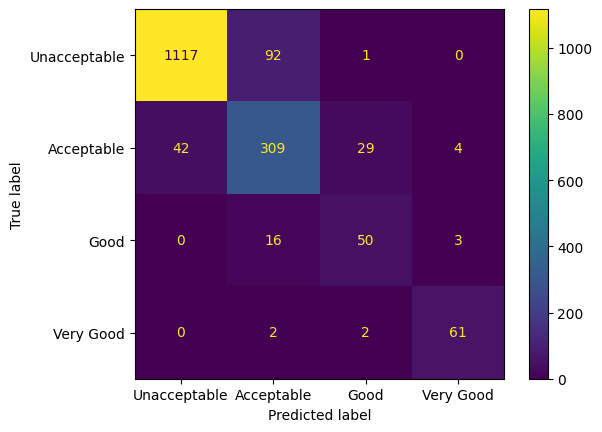

+-----------------------------------------------------+
|     Classification Report for XGBoost Classifier    |
+-----------------------------------------------------+
              precision    recall  f1-score   support

Unacceptable       0.96      0.92      0.94      1210
  Acceptable       0.74      0.80      0.77       384
        Good       0.61      0.72      0.66        69
   Very Good       0.90      0.94      0.92        65

    accuracy                           0.89      1728
   macro avg       0.80      0.85      0.82      1728
weighted avg       0.90      0.89      0.89      1728



In [45]:
metrics_evaluation("XGBoost Classifier", 
                       y, 
                       xgbc_preds)

### Stacking Classifier (Random Forest, KNN, & SVM)

In [46]:
estimators = [
    (
        'random_forest_clf',
        random_forest_classifier()
    ),
    (
        'knn_clf',
        knn_classifier()
    ),
    (
        'svm_clf',
        single_vector_machine_classifier()
    )
]

#### Fit Model

In [47]:
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=XGBClassifier(),
    stack_method='predict',
    n_jobs=-1
)

#### Fit Classifier to Training Dataset

In [48]:
stacking_preds = cross_val_predict(stacking_clf, 
                              X, 
                              y, 
                              n_jobs=-1,
                              cv=10)

#### Confusion Matrix

+-------------------------------------------------------------------------+
|                 Confusion Matrix for Stacking Classifier                |
+-------------------------------------------------------------------------+


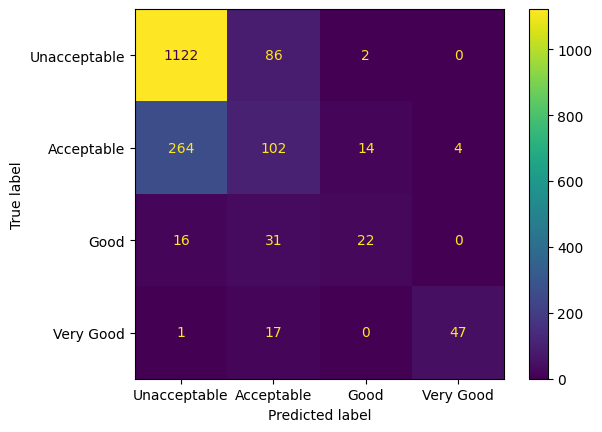

+-----------------------------------------------------+
|    Classification Report for Stacking Classifier    |
+-----------------------------------------------------+
              precision    recall  f1-score   support

Unacceptable       0.80      0.93      0.86      1210
  Acceptable       0.43      0.27      0.33       384
        Good       0.58      0.32      0.41        69
   Very Good       0.92      0.72      0.81        65

    accuracy                           0.75      1728
   macro avg       0.68      0.56      0.60      1728
weighted avg       0.71      0.75      0.72      1728



In [49]:
metrics_evaluation("Stacking Classifier", 
                       y, 
                       stacking_preds)

### Voting Classifier

#### Define Estimators

In [50]:
estimators = [
    (
        'random_forest_clf',
        random_forest_classifier()
    ),
    (
        'knn_clf',
        knn_classifier()
    ),
    (
        'svm_clf',
        single_vector_machine_classifier()
    )
]

#### Fit Model

In [51]:
voting_clf = VotingClassifier(
    estimators=estimators,
    flatten_transform=True,
    n_jobs=-1
)

#### Fit Classifier to Training Dataset

In [52]:
voting_preds = cross_val_predict(voting_clf, 
                              X, 
                              y, 
                              n_jobs=-1,
                              cv=10)

#### Metrics Evaluation

+-------------------------------------------------------------------------+
|                  Confusion Matrix for Voting Classifier                 |
+-------------------------------------------------------------------------+


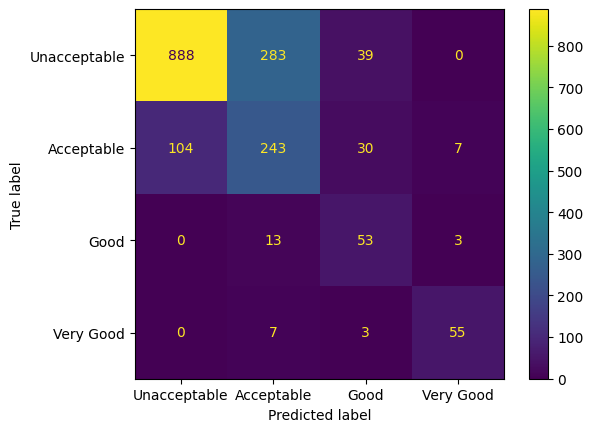

+-----------------------------------------------------+
|     Classification Report for Voting Classifier     |
+-----------------------------------------------------+
              precision    recall  f1-score   support

Unacceptable       0.90      0.73      0.81      1210
  Acceptable       0.45      0.63      0.52       384
        Good       0.42      0.77      0.55        69
   Very Good       0.85      0.85      0.85        65

    accuracy                           0.72      1728
   macro avg       0.65      0.75      0.68      1728
weighted avg       0.77      0.72      0.73      1728



In [53]:
metrics_evaluation("Voting Classifier", 
                       y, 
                       voting_preds)

### Notes & Other Takeaways From This Project
****
- I was hoping for better results.
- The algorithm that performed best was the XGBoost Classifier, with a Macro F1-Score of 0.82.
****